In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

print("All necessary libraries are ready ✅")


All necessary libraries are ready ✅


In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv("maharashtra_full_agriculture_dataset.csv")

In [ ]:
# Basic info
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

Shape: (19900, 11)

Columns:
Index(['District', 'Season', 'Soil_Type', 'N', 'P', 'K', 'Soil_pH',
       'Temperature', 'Humidity', 'Rainfall', 'Crop'],
      dtype='object')


In [ ]:
# First 5 rows
print("\nSample data:")
display(df.head())



Sample data:


,District,Season,Soil_Type,N,P,K,Soil_pH,Temperature,Humidity,Rainfall,Crop
0,Pune,Kharif,Black,72.0,39.0,57.0,7.07,19.14,63.11,99.89,Rice
1,Solapur,Kharif,Black,51.0,31.0,57.0,8.10,26.38,69.25,77.50,Bajra
2,Solapur,Rabi,Black,57.0,34.0,60.0,7.80,25.07,66.45,60.23,Jowar
3,Solapur,Zaid,Black,52.0,30.0,56.0,7.87,25.46,68.03,71.68,Fodder
4,Nashik,Zaid,Loamy,63.0,37.0,58.0,6.86,28.04,33.22,89.55,Vegetables


In [ ]:
# Duplicate rows check
print("\nDuplicate rows:", df.duplicated().sum())



Duplicate rows: 0


In [6]:
# Missing values check
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
District       0
Season         0
Soil_Type      0
N              0
P              0
K              0
Soil_pH        0
Temperature    0
Humidity       0
Rainfall       0
Crop           0
dtype: int64


In [7]:
# Duplicate rows  (before)
print("Before cleaning shape:", df.shape)
print("Duplicate rows:", df.duplicated().sum())

Before cleaning shape: (19900, 11)
Duplicate rows: 0


In [ ]:
# Duplicate rows remove
df = df.drop_duplicates()

In [9]:
# After cleaning
print("\nAfter cleaning shape:", df.shape)
print("Duplicate rows now:", df.duplicated().sum())


After cleaning shape: (19900, 11)
Duplicate rows now: 0


In [10]:
# Target column 
y = df["Crop"]

In [11]:
# Feature columns 
X = df.drop(columns=["Crop"])

print("X shape:", X.shape)
print("y shape:", y.shape)

# X  first 5 rows 
display(X.head())

# y  first 5 values
print(y.head())


X shape: (19900, 10)
y shape: (19900,)


,District,Season,Soil_Type,N,P,K,Soil_pH,Temperature,Humidity,Rainfall
0,Pune,Kharif,Black,72.0,39.0,57.0,7.07,19.14,63.11,99.89
1,Solapur,Kharif,Black,51.0,31.0,57.0,8.10,26.38,69.25,77.50
2,Solapur,Rabi,Black,57.0,34.0,60.0,7.80,25.07,66.45,60.23
3,Solapur,Zaid,Black,52.0,30.0,56.0,7.87,25.46,68.03,71.68
4,Nashik,Zaid,Loamy,63.0,37.0,58.0,6.86,28.04,33.22,89.55


0          Rice
1         Bajra
2         Jowar
3        Fodder
4    Vegetables
Name: Crop, dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create encoders
le_district = LabelEncoder()
le_season = LabelEncoder()
le_soil = LabelEncoder()
le_crop = LabelEncoder()

# Encode categorical features
X["District"] = le_district.fit_transform(X["District"])
X["Season"] = le_season.fit_transform(X["Season"])
X["Soil_Type"] = le_soil.fit_transform(X["Soil_Type"])

# Encode target
y = le_crop.fit_transform(y)

print("Encoding completed ✅")
print("Encoded Districts:", len(le_district.classes_))
print("Encoded Crops:", len(le_crop.classes_))


Encoding completed ✅
Encoded Districts: 36
Encoded Crops: 8


In [13]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (14925, 10) (14925,)
Test shape: (4975, 10) (4975,)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create model with safe limits
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Train model
model.fit(X_train, y_train)

print("Model training completed ✅")


Model training completed ✅


In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Detailed report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Test Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       493
           2       1.00      1.00      1.00       552
           3       1.00      1.00      1.00       521
           4       1.00      1.00      1.00       600
           5       1.00      1.00      1.00       596
           6       1.00      1.00      1.00      1153
           7       1.00      1.00      1.00       565

    accuracy                           1.00      4975
   macro avg       1.00      1.00      1.00      4975
weighted avg       1.00      1.00      1.00      4975



In [16]:
from sklearn.model_selection import cross_val_score

# 5-fold cross validation
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation scores: [1.         1.         1.         0.99949749 1.        ]
Mean CV Accuracy: 0.9998994974874371


In [17]:
import pandas as pd

# Get feature importance from trained model
feature_importance = model.feature_importances_

# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Show top features
print("Top 10 Important Features:")
display(fi_df.head(10))


Top 10 Important Features:


,Feature,Importance
1,Season,0.608059
3,N,0.094875
2,Soil_Type,0.067971
7,Temperature,0.067005
8,Humidity,0.056039
6,Soil_pH,0.047041
9,Rainfall,0.035575
4,P,0.010828
0,District,0.007834
5,K,0.004772


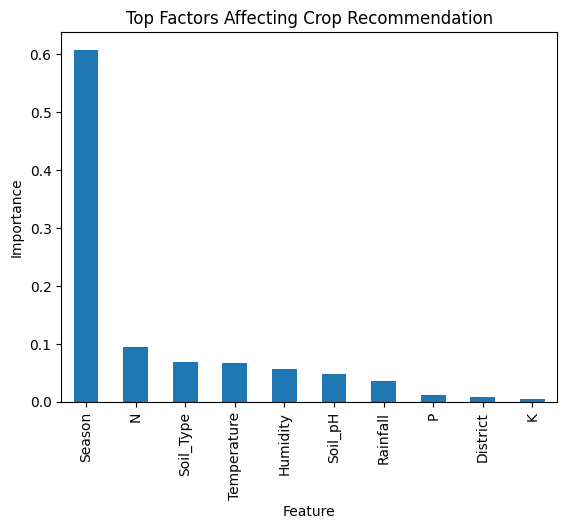

In [18]:
import matplotlib.pyplot as plt

fi_df.head(10).plot(
    x="Feature",
    y="Importance",
    kind="bar",
    legend=False
)

plt.title("Top Factors Affecting Crop Recommendation")
plt.ylabel("Importance")
plt.show()


In [19]:
import joblib

# Save trained model
joblib.dump(model, "final_crop_recommendation_model.pkl")

# Save encoders (important for app)
joblib.dump(le_district, "le_district.pkl")
joblib.dump(le_season, "le_season.pkl")
joblib.dump(le_soil, "le_soil.pkl")
joblib.dump(le_crop, "le_crop.pkl")

print("Model and encoders saved successfully ✅")


Model and encoders saved successfully ✅
